# **Heart Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Step 1: Import the necessary libraries

In [47]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

#for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

### Step 2: Load the dataset

In [48]:
df = pd.read_csv(r'/workspaces/Heart-Disease-Prediction-Model/data/heart.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [49]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [51]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Chol            918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Shape of the data
(918, 12)
Number of Rows : 918
Number of Columns : 12


### Step 4: Statistical Insights

In [52]:
df.describe()

,Age,RestingBP,Chol,FastingBS,MaxHR,Oldpeak,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
df['Target'].value_counts()

1    508
0    410
Name: Target, dtype: int64

1 represents a Defective heart  **||**  0 represents a Healthy heart

### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

##### Missing Values

In [54]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Chol              0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

##### Duplicate Values

In [55]:
df.duplicated().sum()

0

##### Outliers

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

**Age**

<Axes: xlabel='Age'>

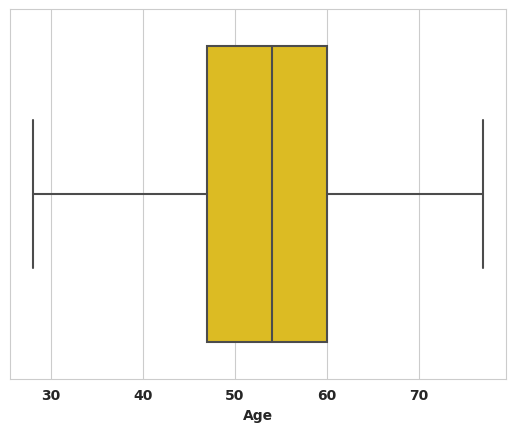

In [56]:
sns.boxplot(x = 'Age', data=df, color='#fbcf04')

**Resting Blood Pressure**

<Axes: xlabel='RestingBP'>

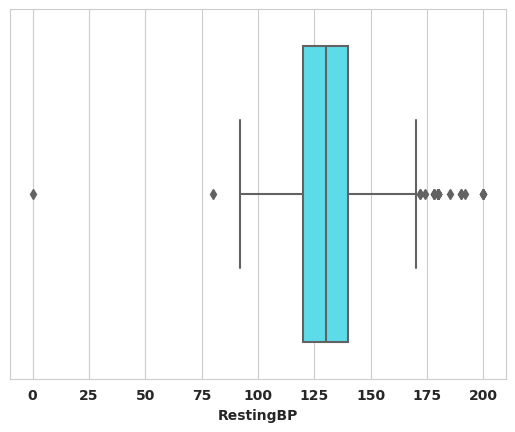

In [57]:
sns.boxplot(x = 'RestingBP', data=df, color='#47EEFF')

The outliers above are problematic. To have a Resting Blood Pressure of below 100 and above 175 is practically impossible, hence we will be removing them.

In [58]:
df = df[df['RestingBP']>75]
df = df[df['RestingBP']<175]

In [59]:
df.shape

(894, 12)

**Cholesterol**

<Axes: xlabel='Chol'>

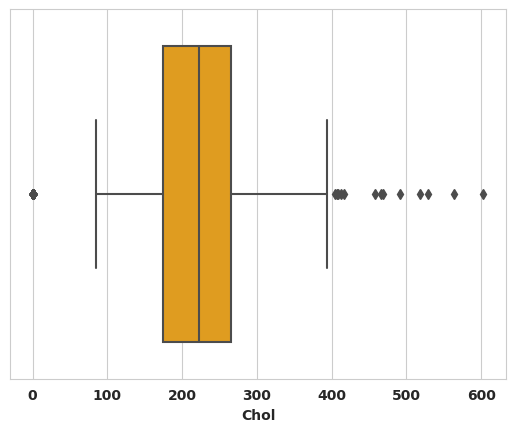

In [60]:
sns.boxplot(x = 'Chol', data=df, color='orange')

**Maximum Heart Rate**

<Axes: xlabel='MaxHR'>

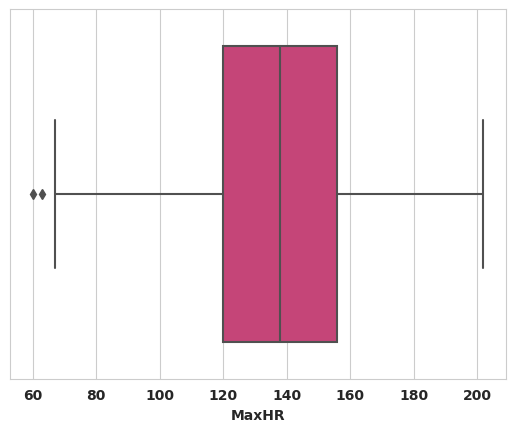

In [61]:
sns.boxplot(x = 'MaxHR', data=df, color='#da3074')

**OldPeak**

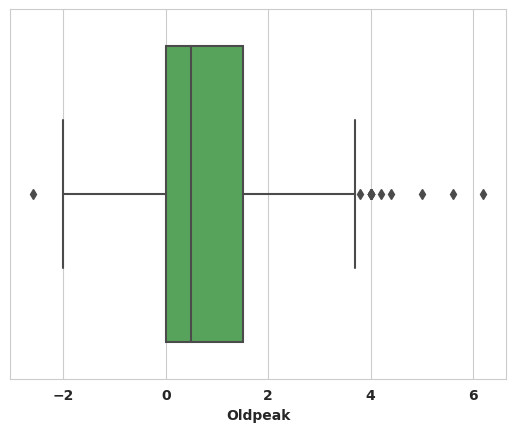

In [62]:
sns.boxplot(x = 'Oldpeak', data=df, color='#4CAF50')
plt.show()

### Step 6: Data Visualisation

**Correlation**

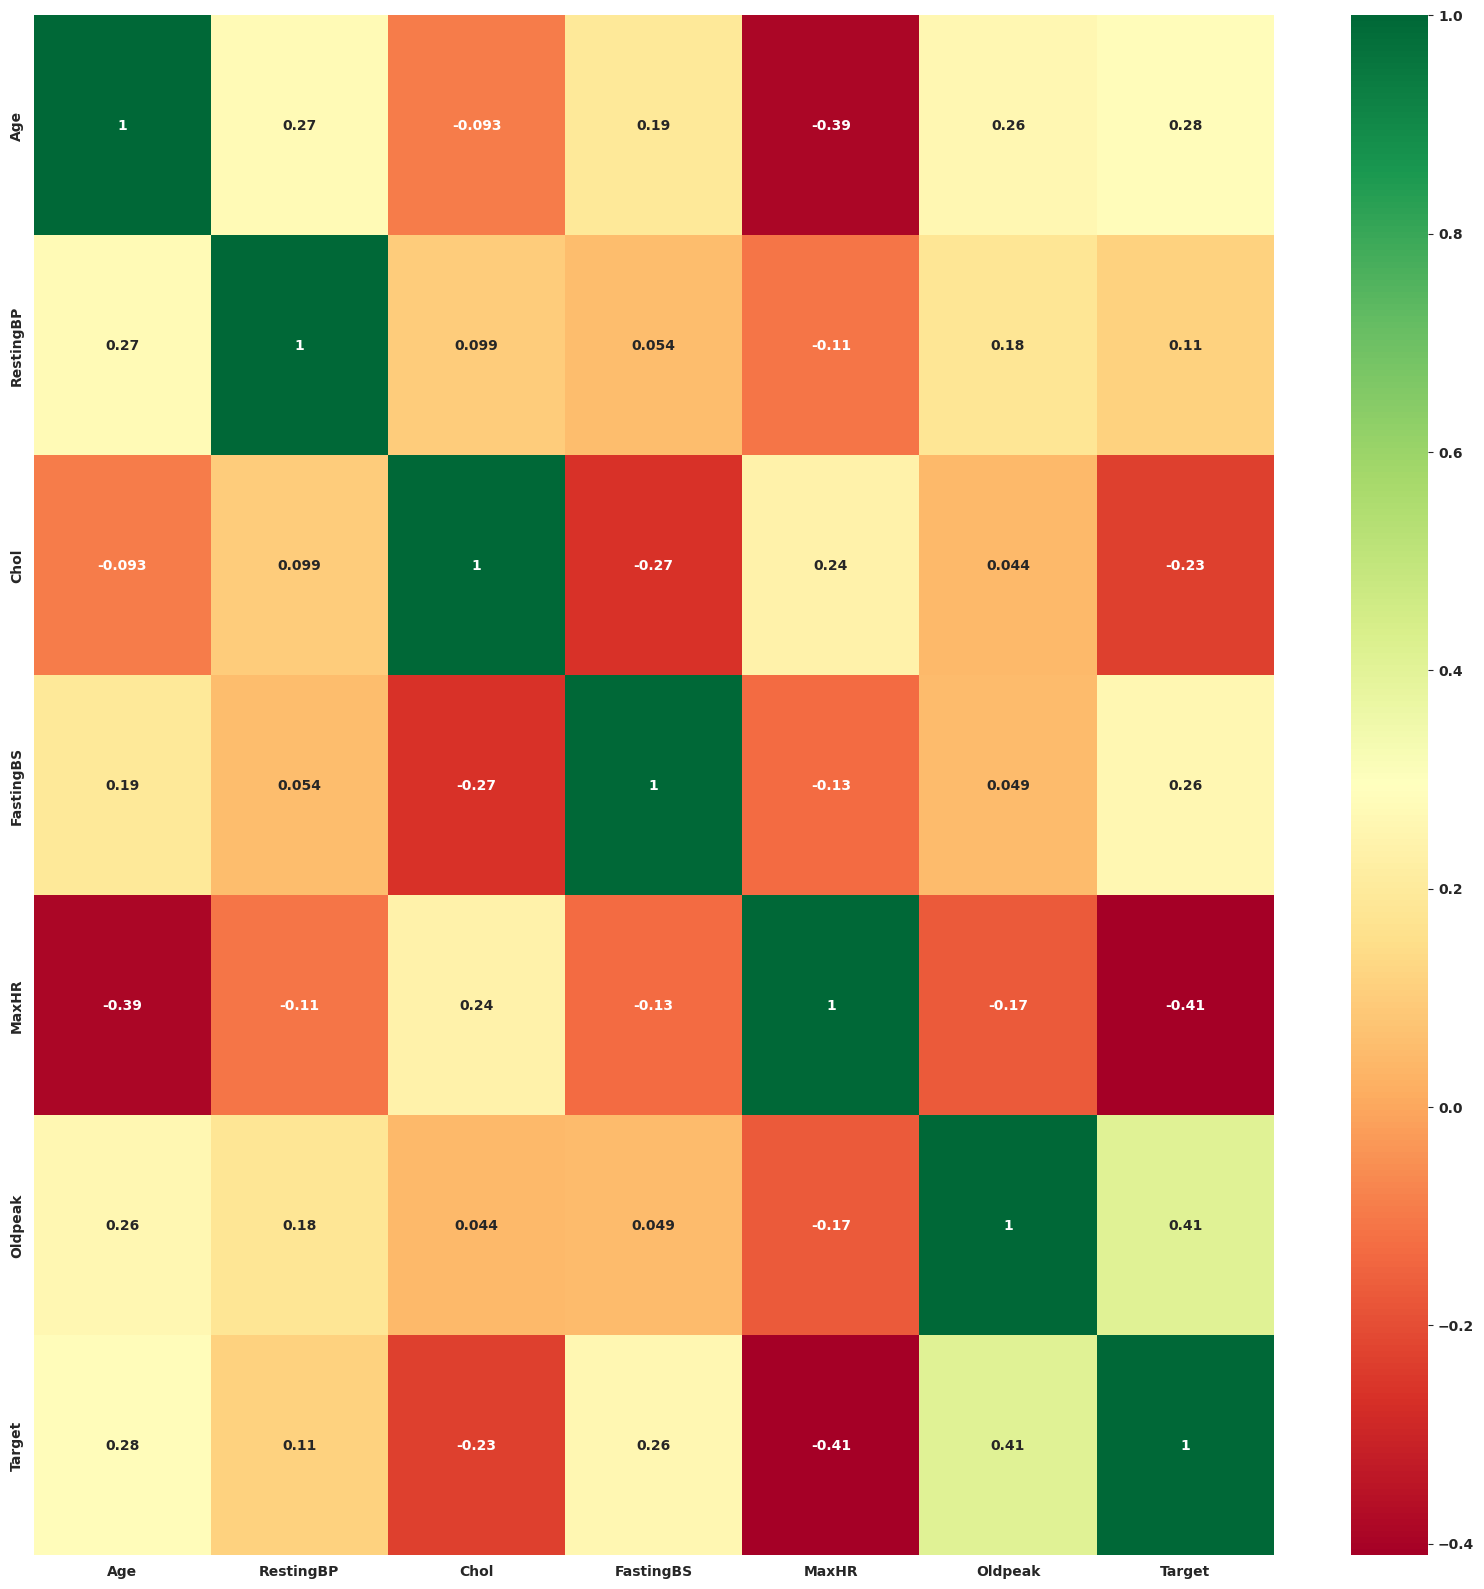

In [63]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Age**

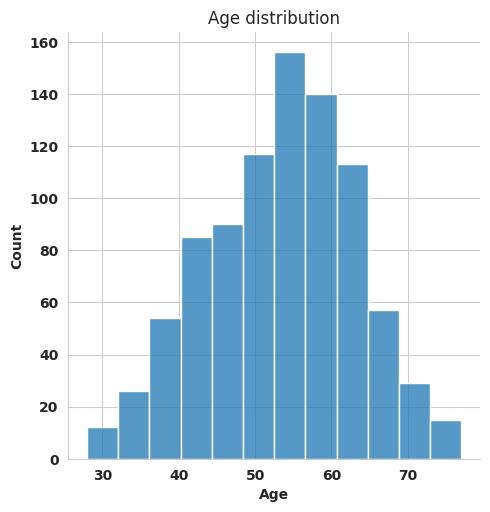

In [64]:
sns.displot(df['Age'], bins=12)
plt.title('Age distribution')
plt.show()

From the above graph, we can deduce that most patients lie between the ages of 50 and 60 years.

**Sex**

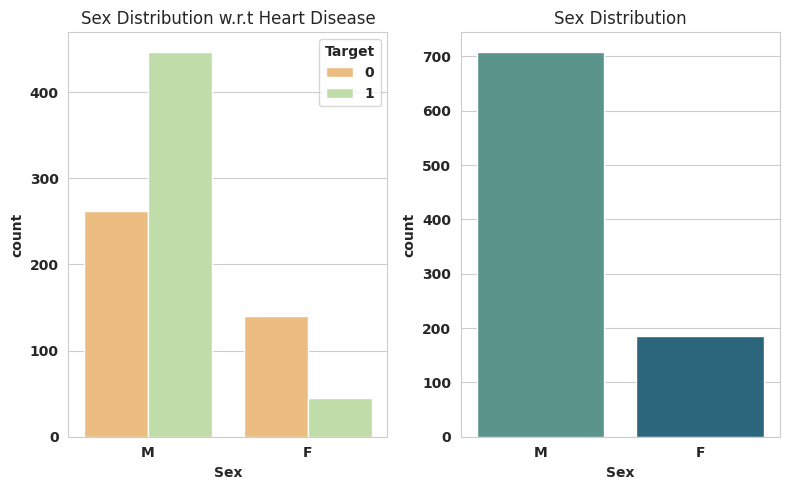

In [65]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Sex', data=df, palette='Spectral',hue='Target')
plt.title('Sex Distribution w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Sex', data=df, palette='crest')
plt.title('Sex Distribution')

plt.tight_layout()

Our dataset consists of mostly male candidates. Out of which, over 400 males have heart disease.

**Chest Pain Type**

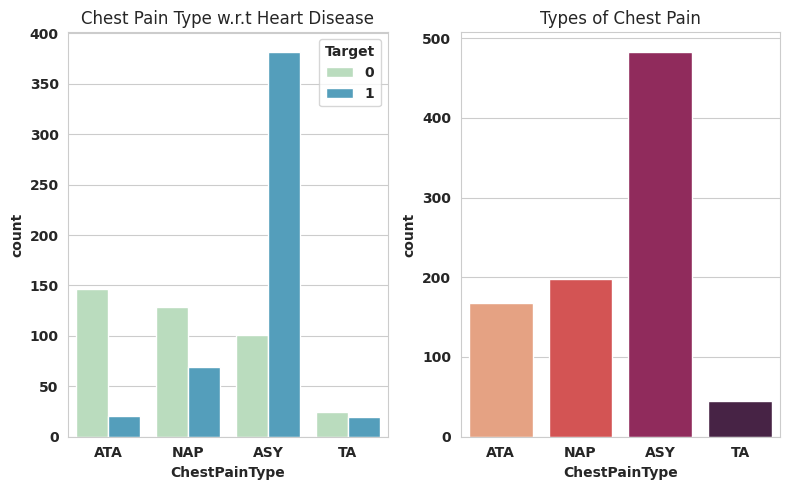

In [66]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x ='ChestPainType',hue='Target', data=df, palette='GnBu')
plt.title('Chest Pain Type w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x ='ChestPainType',data=df, palette='rocket_r')
plt.title('Types of Chest Pain')

plt.tight_layout()


There are 4 types of Chest Pain : 
* ATA - Atypical Angina
* NAP - Non-Anginal Pain
* ASY - Asymptomatic
* TA - Typical Angina

From the above graphs, we can infer that ASY(Asymptomatic chest pain) is the primary form of chest pain experienced by individuals with heart disease.

**Resting Blood Pressure**

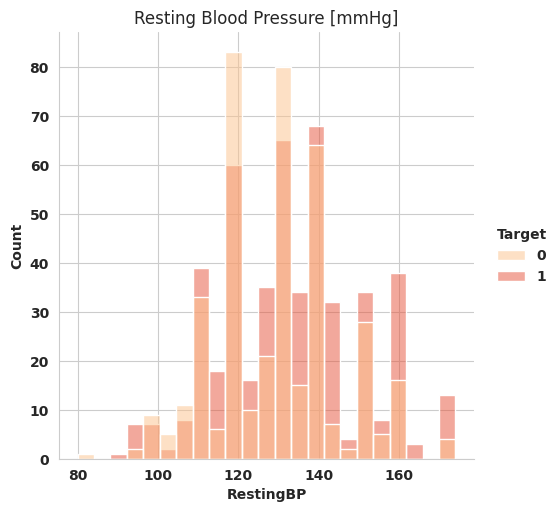

In [67]:
sns.displot(x = 'RestingBP', data=df, hue='Target', palette='OrRd')
plt.title('Resting Blood Pressure [mmHg]')
plt.show()

The resting blood pressure of many individuals lies between 120 and 140.

**RestingECG**

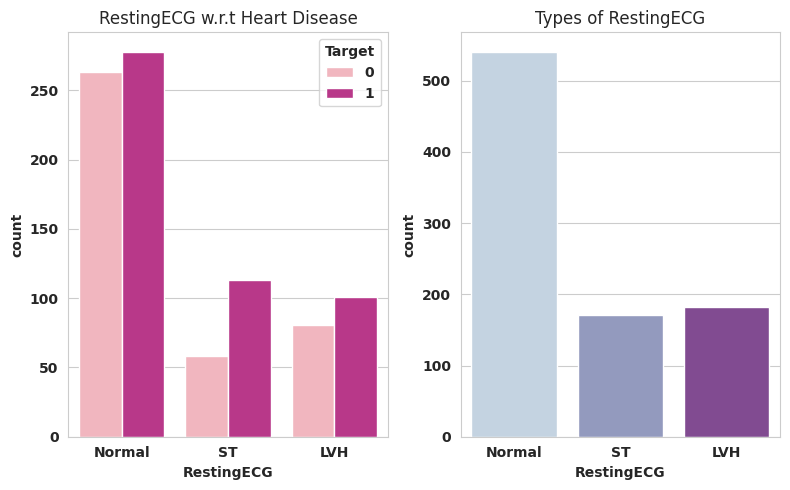

In [68]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'RestingECG', hue='Target',data=df,palette='RdPu')
plt.title('RestingECG w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'RestingECG', data=df,palette='BuPu')
plt.title('Types of RestingECG')

plt.tight_layout()


There are 3 types of Resting Electrocardiogram Results:
- Normal: Normal
- ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

Most of the individuals have Normal RestingECG results, and most of them with this result have heart disease.

**Cholesterol**

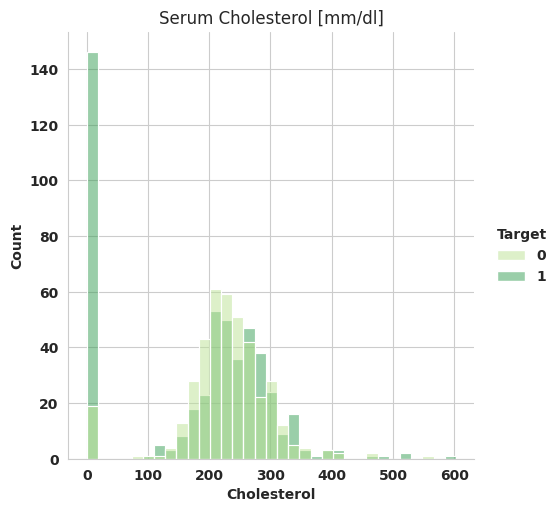

In [69]:
sns.displot(x = 'Chol', data=df, hue='Target', palette='YlGn')
plt.xlabel('Cholesterol')
plt.title('Serum Cholesterol [mm/dl]')
plt.show()

Most individuals have 0 mm/dl serum cholesterol.

**Fasting Blood Sugar**

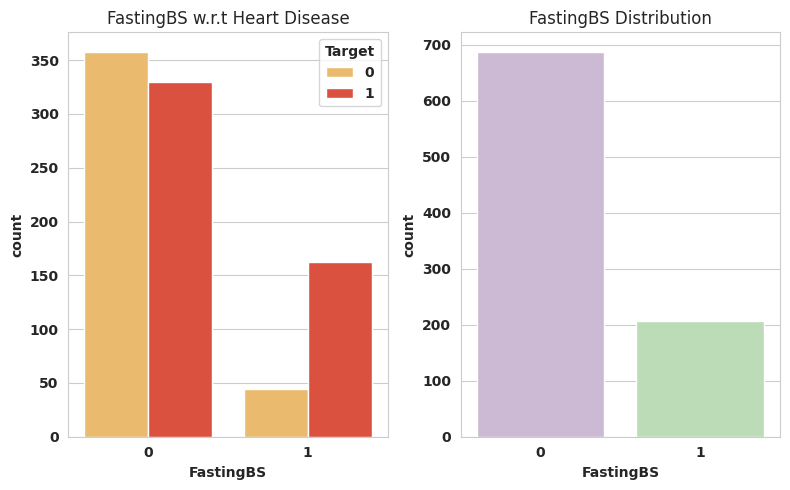

In [70]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'FastingBS', hue='Target',data=df,palette='YlOrRd')
plt.title('FastingBS w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'FastingBS',data=df,palette='PRGn')
plt.title('FastingBS Distribution')

plt.tight_layout()

FastingBS (Fasting Blood Sugar) has been divided into 2 classes:
- 1: FastingBS > 120 mg/dl
- 0: FastingBS <= 120 mg/dl

Most of the individuals in this dataset have a FastingBS of less than 120 mg/dl. From the graphs above, we can see that those with heart disease are more likely to have a FastingBS of greater than 120 mg/dl.

**Maximum Heart Rate**

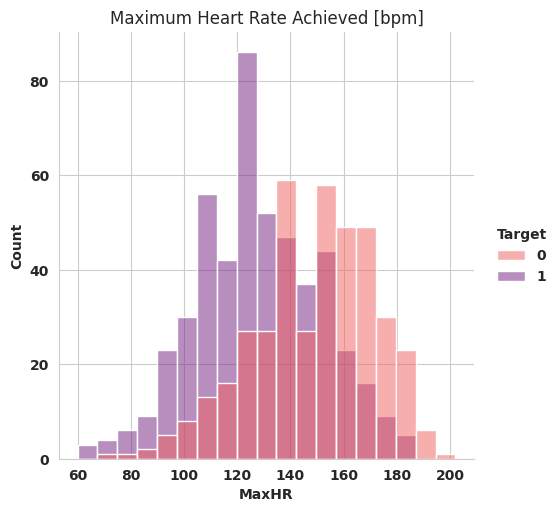

In [71]:
sns.displot(x = 'MaxHR', hue='Target',data=df,palette='magma_r')
plt.title('Maximum Heart Rate Achieved [bpm]')
plt.show()

The Maximum Heart Rate achieved lies between 60 and 202, and most individuals have achieved a maximum heart rate that lies between 120 and 140.

**Exercise Induced Angina**

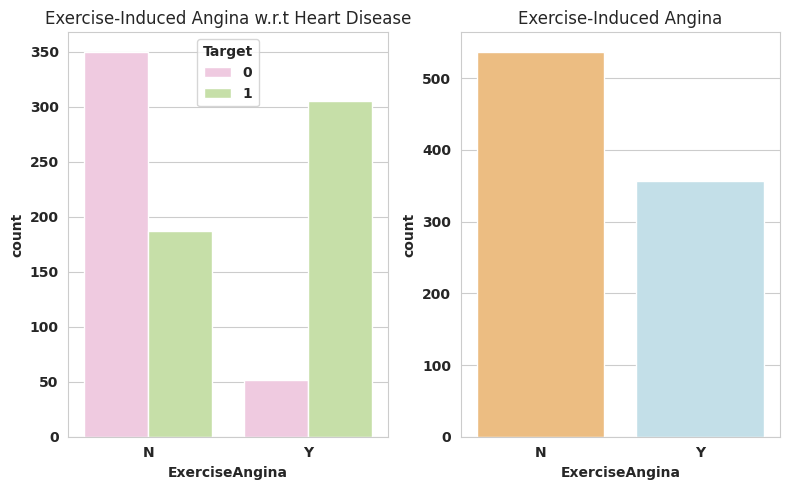

In [72]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'ExerciseAngina', hue='Target',data=df,palette='PiYG')
plt.title('Exercise-Induced Angina w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ExerciseAngina', data=df,palette='RdYlBu')
plt.title('Exercise-Induced Angina')

plt.tight_layout()

ExerciseAngina (Exercise-Induced Angina) is divided into 2 classes :
- N: No
- Y: Yes

This dataset contains more people with no exercise-induced angina.
From the above graphs we can infer that most individuals with Heart Disease tend to have exercise-induced angina.

**OldPeak**

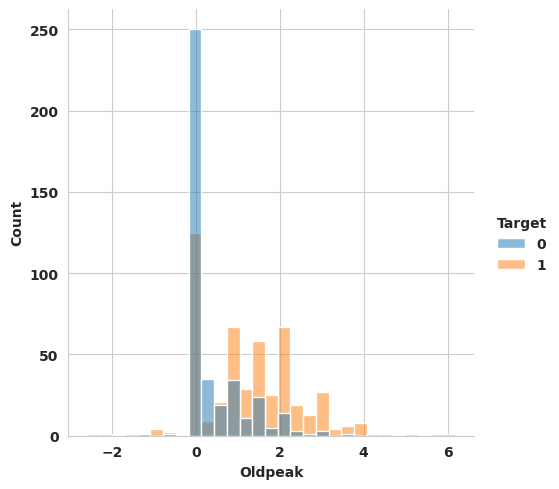

In [73]:
sns.displot(x = 'Oldpeak', data=df, hue='Target')
plt.show()

Oldpeak is the ST depression induced by exercise relative to rest where, 'ST' relates to positions on the ECG plot.

**ST Slope**

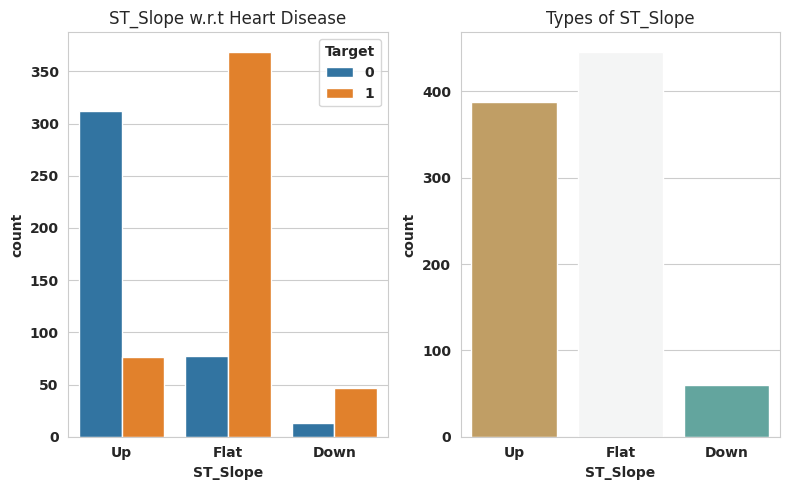

In [74]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'ST_Slope', data=df, hue='Target')
plt.title('ST_Slope w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ST_Slope', data=df,palette='BrBG')
plt.title('Types of ST_Slope')

plt.tight_layout()

**Target**

<Axes: xlabel='Target', ylabel='count'>

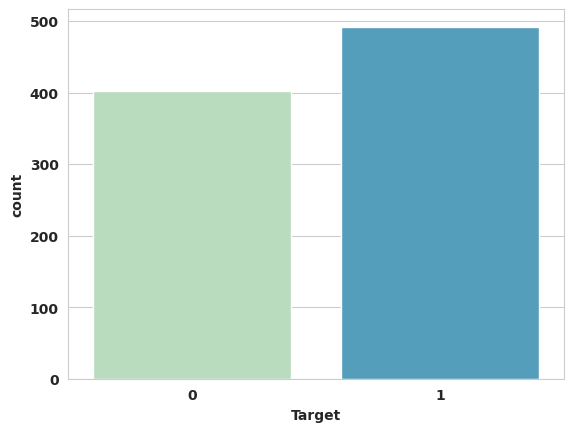

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='GnBu')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

**Splitting the Dataset**

In [76]:
X = df.drop(columns='Target',axis=1)
Y= df['Target'] 

In [77]:
print(X)

     Age Sex ChestPainType  RestingBP  Chol  FastingBS RestingECG  MaxHR  \
0     40   M           ATA        140   289          0     Normal    172   
1     49   F           NAP        160   180          0     Normal    156   
2     37   M           ATA        130   283          0         ST     98   
3     48   F           ASY        138   214          0     Normal    108   
4     54   M           NAP        150   195          0     Normal    122   
..   ...  ..           ...        ...   ...        ...        ...    ...   
913   45   M            TA        110   264          0     Normal    132   
914   68   M           ASY        144   193          1     Normal    141   
915   57   M           ASY        130   131          0     Normal    115   
916   57   F           ATA        130   236          0        LVH    174   
917   38   M           NAP        138   175          0     Normal    173   

    ExerciseAngina  Oldpeak ST_Slope  
0                N      0.0       Up  
1        

In [78]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: Target, Length: 894, dtype: int64


In [79]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [80]:
print(X.shape,X_train.shape,X_test.shape)

(894, 11) (715, 11) (179, 11)


In [81]:
df = pd.get_dummies(df,columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [82]:
df.head()

,Age,RestingBP,Chol,FastingBS,MaxHR,Oldpeak,Target,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                894 non-null    int64  
 1   RestingBP          894 non-null    int64  
 2   Chol               894 non-null    int64  
 3   FastingBS          894 non-null    int64  
 4   MaxHR              894 non-null    int64  
 5   Oldpeak            894 non-null    float64
 6   Target             894 non-null    int64  
 7   Sex_F              894 non-null    uint8  
 8   Sex_M              894 non-null    uint8  
 9   ChestPainType_ASY  894 non-null    uint8  
 10  ChestPainType_ATA  894 non-null    uint8  
 11  ChestPainType_NAP  894 non-null    uint8  
 12  ChestPainType_TA   894 non-null    uint8  
 13  RestingECG_LVH     894 non-null    uint8  
 14  RestingECG_Normal  894 non-null    uint8  
 15  RestingECG_ST      894 non-null    uint8  
 16  ExerciseAngina_N   894 non

In [84]:
X= df.drop(['Target'],axis=1)
Y= df['Target']

**K-NEAREST NEIGHBOUR(KNN) ALGORITHM**

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_scores = []

for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_scaled, Y, cv=10)
    knn_scores.append(score.mean())

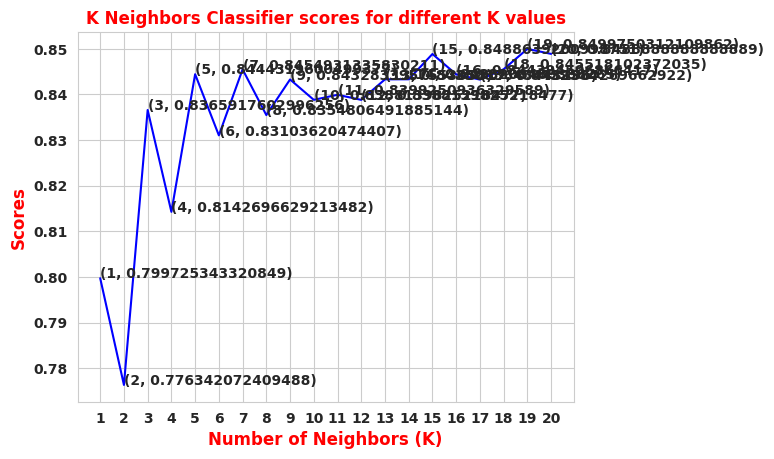

In [86]:
import matplotlib.pyplot as plt
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [87]:
X_train_scaled , X_test_scaled, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=2)

In [88]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(X_train_scaled,Y_train)
Y_pred_knn = knn_classifier.predict(X_test_scaled)

In [89]:
accuracy_score(Y_test,Y_pred_knn)

0.8770949720670391

In [90]:
scoreknn=cross_val_score(knn_classifier,X_scaled,Y,cv=10)
scoreknn.mean()

0.8388139825218477

**RANDOM FOREST CLASSIFIER**

In [91]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X_train_scaled,Y_train)
Y_pred_rfc = randomforest_classifier.predict(X_test_scaled)

In [92]:
accuracy_score(Y_test,Y_pred_rfc)

0.8491620111731844

In [93]:
scorerfc = cross_val_score(randomforest_classifier,X_scaled,Y,cv=10)
scorerfc.mean()

0.8331460674157304

**LOGISTIC REGRESSION**

In [94]:
logre = LogisticRegression(solver='liblinear')
logre.fit(X_train_scaled,Y_train)
Y_pred_lr = logre.predict(X_test_scaled)

In [95]:
accuracy_score(Y_test,Y_pred_lr)

0.8770949720670391

In [96]:
scorelr = cross_val_score(logre,X_scaled,Y,cv=10)
scorelr.mean()

0.8477278401997502

**SUPPORT VECTOR MACHINES(SVM) ALGORITHM**

In [97]:
svm = SVC()
svm.fit(X_train_scaled,Y_train)
Y_pred_svm = svm.predict(X_test_scaled)

In [98]:
accuracy_score(Y_test,Y_pred_svm)

0.8715083798882681

In [99]:
scoresvm = cross_val_score(svm,X_scaled,Y,cv=10)
scoresvm.mean()

0.8487890137328341

### Step 9: Model Evaluation

### Step 10: Testing the Model

- Take user input and predict the output